# Wafer map notebook
This notebook maps out wafer thickness maps from ellipsometry data. Data consists of wafer mapping carried out in LNF's Woolam ellipsometer.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import griddata
import re
from matplotlib.ticker import MaxNLocator

## Import and clean data

In [14]:
# Import raw data from excel file and collect sheet names
data = pd.ExcelFile('NiO_011620.xlsx')
samples = data.sheet_names

# Get x and y coordinates from ellipsometry map
df = pd.read_excel(data, sheet_name=samples[0])
coords = df['Position (cm)']
x = [float((re.findall(r"[-+]?\d*\.*\d+", coords[i])[0])) for i in range(5, len(coords))]
y = [float((re.findall(r"[-+]?\d*\.*\d+", coords[i])[1])) for i in range(5, len(coords))]

# Get column name with thickness
col_name = df.columns[2]

# Initialize data frame with x and y
df = pd.DataFrame({'x':x, 'y':y})

# Update data frame with thickness columns
for sample in samples:
    thickness = pd.read_excel(data, sheet_name=sample)[col_name]/10
    df[sample] =  thickness[5:len(thickness)].reset_index(drop=True)

## Define interpolation parameters

In [15]:
# target grid for interpolation
xi = yi = np.arange(min(x)-0.1,max(x)+0.1,0.01)
xi,yi = np.meshgrid(xi,yi)


## Interpolate and plot

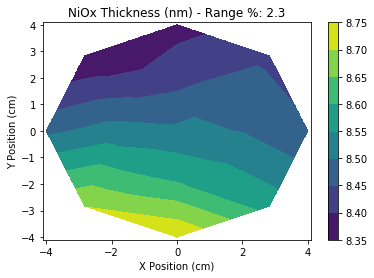

In [16]:
#fig, ax = plt.subplots(nrows=2, ncols=2)
#levels = MaxNLocator(nbins=50).tick_values(15, 40)

# Interpolate using three different methods and plot
for i in range(0, len(samples)):
    zi = griddata((x, y), df[samples[i]], (xi, yi), method='linear')
    rng = (df[samples[i]].max()-df[samples[i]].min())/df[samples[i]].mean()/2*100
    plt.contourf(xi, yi, zi)#, levels=levels)
    plt.xlabel('X Position (cm)')
    plt.ylabel('Y Position (cm)')
    plt.colorbar()
    plt.title('{} Thickness (nm) - Range %: {}'.format('NiOx', np.round(rng,1)))
    plt.savefig(samples[i], dpi=300)
    plt.show()
    # add dots with actual measurements

In [5]:
sn = [1, 1, 2, 3, 3]
zn = [1, 3, 2, 1, 3]
rng = [30.1, 44.9, 42.1, 21.3, 43.6]
avg_thick = [370, 397, 395, 335, 369]

In [6]:
xi = yi = np.arange(min(sn),max(sn)+1,1)
xi,yi = np.meshgrid(xi,yi)
zi = griddata((zn, sn), avg_thick, (xi, yi), method='cubic')

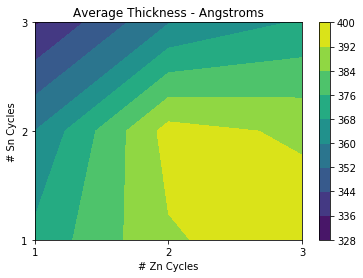

In [7]:
plt.contourf(xi, yi, zi)
plt.colorbar()
plt.xticks(np.arange(1, 4, step=1))
plt.xlabel('# Zn Cycles')
plt.yticks(np.arange(1, 4, step=1))
plt.ylabel('# Sn Cycles')
plt.title('Average Thickness - Angstroms')
plt.savefig('thickness', dpi=300)
plt.show()


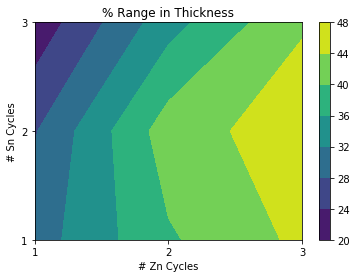

In [8]:
zi = griddata((zn, sn), rng, (xi, yi), method='cubic')
plt.contourf(xi, yi, zi)
plt.colorbar()
plt.xticks(np.arange(1, 4, step=1))
plt.xlabel('# Zn Cycles')
plt.yticks(np.arange(1, 4, step=1))
plt.ylabel('# Sn Cycles')
plt.title('% Range in Thickness')
plt.savefig('range', dpi=300)
plt.show()
